## Importing Libraries 

In [21]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import numpy as np
import pandas as pd

## Loading Data & Overview 

In [90]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [91]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

print(f"Length of X_train : {len(X_train)}")
print(f"Length of X_test : {len(X_test)}")
print(f"Length of y_train : {len(y_train)}")
print(f"Length of y_test : {len(y_test)}")

Length of X_train : 60000
Length of X_test : 10000
Length of y_train : 60000
Length of y_test : 10000


- **Finding shape of 2d lists**

```python
l =np.array([[1,2],[3,4],[6,7]])
l.shape ## (3,2)
```

```python
l =np.array([[1,2,3],[3,4,5],[6,7,8]])
l.shape ## (3,3)
```

```python
l = np.array([1,2,3])
l[0].shape ## ()
```

```python
l = [1,2,3]
l[0].shape ## AttributeError: 'int' object has no attribute 'shape'
```

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of X_test (10000, 28, 28)
Shape of y_test (10000,)
-------------------------------------------
Shape of X_train[0] (28, 28)
Shape of y_train[0] ()
y_train value 5


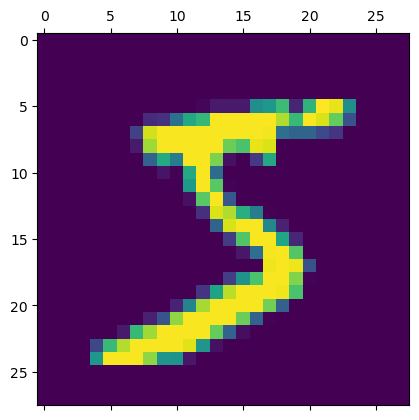

In [92]:
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_test {y_test.shape}")
print('-------------------------------------------')
print(f"Shape of X_train[0] {X_train[0].shape}")
print(f"Shape of y_train[0] {y_train[0].shape}")

print(f"y_train value {y_train[0]}")
#print(f"X_train value {X_train[0]}")

## matshow visualizes a 2D matrix or array as color-coded image.
plt.matshow(X_train[0])
plt.show()

#### List of labels / categories in y 


In [93]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Count of unique labels in the dataset

In [112]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


##  Pre-processing

#### Scaling the grayscale values in range(0,1)
- Since the values are in range of 0 to 255, to convert them in range(0,1) the values are divided by 255

In [94]:
X_train = X_train / 255
X_test = X_test / 255

In [95]:
X_train.shape

(60000, 28, 28)

In [96]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [97]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


##  Model Building

#### Simple NN 

In [98]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


C:\Users\hornt\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8046 - loss: 0.7391
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9147 - loss: 0.3064
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9201 - loss: 0.2843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9245 - loss: 0.2736
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9271 - loss: 0.2651


In [99]:
model.evaluate(X_test_flattened, y_test)
y_predicted = model.predict(X_test_flattened)
print(y_predicted.shape)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9126 - loss: 0.3083
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(10000, 10)


array([2.8076708e-02, 3.4473015e-07, 6.1600443e-02, 9.6665072e-01,
       2.5897340e-03, 1.4160804e-01, 1.5202270e-06, 9.9980617e-01,
       9.5193848e-02, 5.5882388e-01], dtype=float32)

In [100]:
print(np.max(y_predicted[0]))
print(np.argmax(y_predicted[0]))
print(y_test[0])

0.99980617
7
7


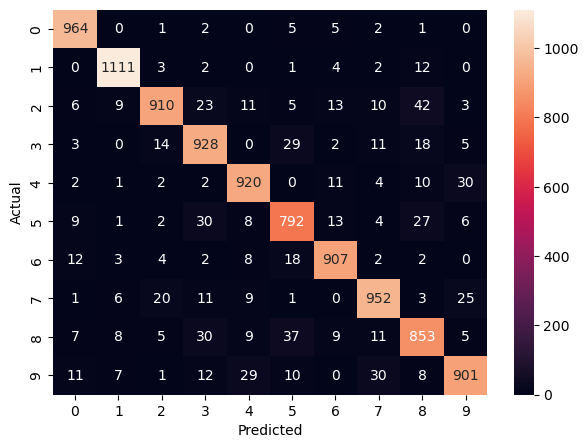

In [101]:
y_pred_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [102]:
coef, intercept = model.get_weights()

#### Using Hidden Layer 

C:\Users\hornt\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8692 - loss: 0.4496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9604 - loss: 0.1374
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9731 - loss: 0.0907
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9797 - loss: 0.0689
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9829 - loss: 0.0534
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9743 - loss: 0.0869
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


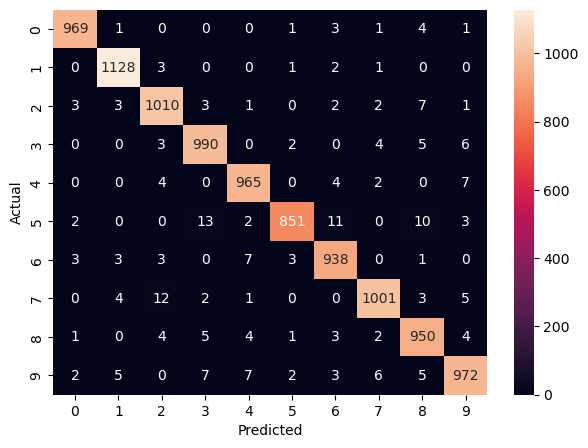

In [103]:
model = keras.Sequential([
     keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)
model.evaluate(X_test_flattened, y_test)
y_predicted = model.predict(X_test_flattened)
print(y_predicted.shape)

y_pred_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Using Flattened Layer to skip reshaping of data 

Epoch 1/10


C:\Users\hornt\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8708 - loss: 0.4530
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9612 - loss: 0.1308
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9736 - loss: 0.0883
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9803 - loss: 0.0638
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0487
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0393
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9916 - loss: 0.0294
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0230
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9936 - loss: 0.0212
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9954 - loss: 0.0165
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.1011
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


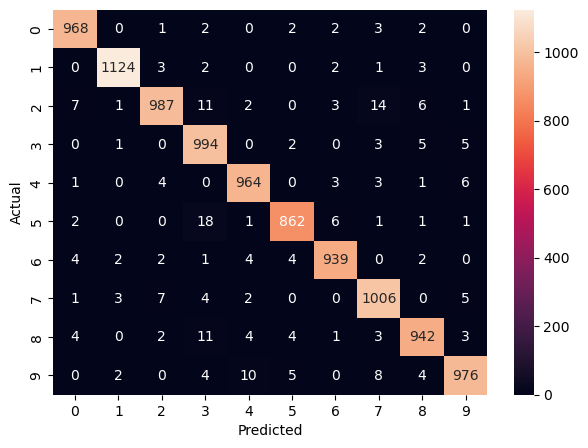

In [109]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/dir", histogram_freq=1)

model.fit(X_train, y_train, epochs=10,callbacks=[tb_callback])

model.evaluate(X_test, y_test)
y_predicted = model.predict(X_test)
print(y_predicted.shape)

y_pred_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [111]:
%load_ext tensorboard
%tensorboard --logdir logs/dir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
model.get_weights()

#### Using CNN Model 

In [120]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation,Conv2D,MaxPooling2D

cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#b_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/dir", histogram_freq=1)

cnn.fit(X_train, y_train, epochs=10)

cnn.evaluate(X_test, y_test)
y_predicted = cnn.predict(X_test)
print(y_predicted.shape)

y_pred_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
#cm


C:\Users\hornt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9165 - loss: 0.2914
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9841 - loss: 0.0518
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9901 - loss: 0.0315
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9933 - loss: 0.0212
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9950 - loss: 0.0143
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9976 - loss: 0.0078
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9979 - loss: 0.0061
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9978 - loss: 0.0057
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9990 - loss: 0.0034
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9991 - loss: 0.0029
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0665
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

###### Plotting Confusion Matrix

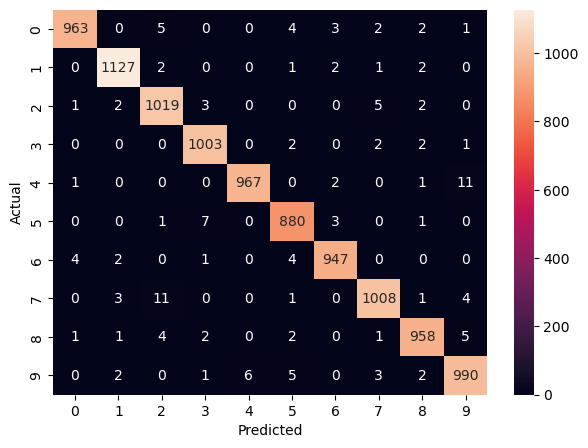

In [121]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###### Classification Report

In [122]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###### CNN Model Architecture Summary

In [123]:
cnn.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,692 (6.21 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,084,462 (4.14 MB)